In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from collections import OrderedDict

In [2]:
df= pd.read_pickle('/Users/petrick/Desktop/duke/fall2022/PM2.5-prediction-with-Satellite-images/label.pkl')
image= df[0]

In [3]:
loc= pd.read_pickle('/Users/petrick/Desktop/duke/fall2022/PM2.5-prediction-with-Satellite-images/sensor_locations.pkl')

In [4]:
gridx= np.arange(0,0.5,0.01)
gridy= np.arange(0,0.5,0.01)

pm= [pm for _,pm in image['detail'].items()]
pm

[105.12,
 152.29,
 111.13,
 69.65,
 107.62,
 56.5,
 162.05,
 85.06,
 71.96,
 93.11,
 190.42,
 70.45,
 115.2,
 115.08,
 134.64,
 133.54,
 139.44,
 122.31,
 96.11,
 115.2,
 155.83,
 119.38,
 71.39,
 117.62,
 143.62,
 96.49,
 110.67,
 116.08,
 110.83,
 166.62,
 82.49]

In [5]:
for image in df:
    image['sen_lat']={}
    image['sen_lon']={}
    for key,value in loc.items():
        if key in image['detail'].keys():
            image['sen_lat'][key]= value['lat']
            image['sen_lon'][key]= value['lon']

In [6]:
# import pickle
# pickle.dump(df,open('/Users/petrick/Desktop/duke/fall2022/PM2.5-prediction-with-Satellite-images/final_im.pkl','wb'))

Plotting Enabled

Initializing variogram model...
Coordinates type: 'geographic' 

Using 'spherical' Variogram Model
Partial Sill: 213.72400000000005
Full Sill: 1014.998
Range: 0.1
Nugget: 801.274 



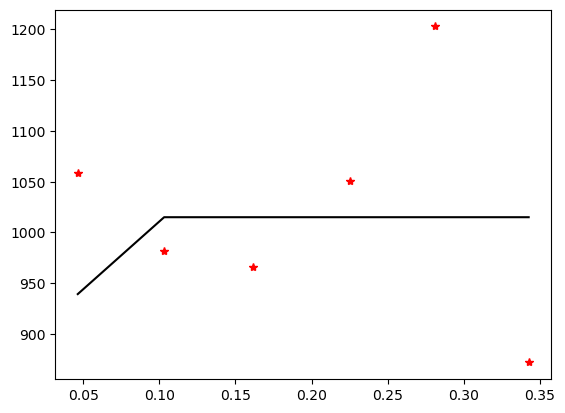

Calculating statistics on variogram model fit...


In [7]:
x= [i for i in OrderedDict(sorted(df[0]['sen_lon'].items())).values()]
y=[i for i in OrderedDict(sorted(df[0]['sen_lat'].items())).values()]
phi=[i for i in OrderedDict(sorted(df[0]['detail'].items())).values()]

Ok= OrdinaryKriging(
    x,
    y,
    phi,
    variogram_model='spherical',
    verbose=True,
    enable_plotting=True,
    coordinates_type='geographic',
    # exact_values=False,
    variogram_parameters= {'sill': 1014.998, 'range':0.1, 'nugget':801.274}
)

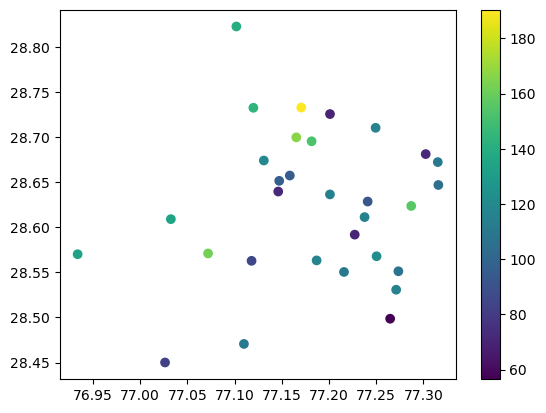

In [8]:
plt.scatter(x,y,c=phi)
plt.colorbar()

In [9]:
gridx= np.arange(76.9,77.4,0.01)
gridy= np.arange(28.4,28.9,0.01)

zstar, ss= Ok.execute('grid', gridx,gridy)

Executing Ordinary Kriging...



In [10]:
np.mean(phi)

114.12580645161289

In [11]:
print(zstar.shape)
print(ss.shape)

(50, 50)
(50, 50)


Text(0.5, 1.0, 'Kriging')

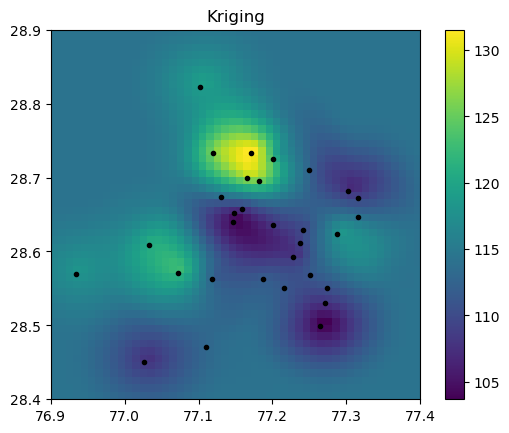

In [12]:
cax= plt.imshow(zstar.data, extent=(76.9,77.4,28.4,28.9), origin='lower')
plt.scatter(x,y, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Kriging')

In [32]:
# Retrive pseudolabel for each pic

0.9231//0.001


923.0

In [33]:
# gridx= np.arange(76.9,77.4,0.01)
# gridy= np.arange(28.4,28.9,0.01)
from tqdm import tqdm

x_base= 76.9
y_base= 28.4

# def retrive_label(images, df, x_base, y_base):
#     for image in images:
#         x_co= image['lon']- x_base
#         y_co= image['lat']- y_base

#         image['pseudo_label']= df.data[x_co][y_co]
#     return images

for image in tqdm(df):
    x_co= int((image['lon']- x_base) // 0.01)
    y_co= int((image['lat']- y_base) // 0.01)

    image['pseudo_label']= zstar.data[x_co][y_co]


100%|██████████| 836/836 [00:00<00:00, 39190.34it/s]


In [34]:
image= df[0]
image

{'Image': array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [142, 135, 124],
         [132, 126, 114],
         [131, 126, 112]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [154, 145, 134],
         [156, 147, 135],
         [138, 132, 119]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [141, 136, 126],
         [148, 141, 129],
         [136, 130, 117]],
 
        ...,
 
        [[121, 122, 110],
         [126, 126, 114],
         [121, 122, 110],
         ...,
         [161, 152, 141],
         [178, 166, 153],
         [154, 147, 135]],
 
        [[119, 120, 108],
         [121, 121, 108],
         [115, 115, 103],
         ...,
         [157, 147, 135],
         [156, 150, 136],
         [145, 140, 129]],
 
        [[118, 119, 106],
         [114, 115, 102],
         [106, 106,  95],
         ...,
         [157, 149,